/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stocha

Epoch 01 | w = [ 0.5851116   0.20863051 -0.0969338 ], b = -0.0046, loss = 0.1458
Epoch 02 | w = [ 0.78633843  0.2511443  -0.1117812 ], b = -0.0051, loss = 0.0552
Epoch 03 | w = [ 0.85701867  0.25661058 -0.11283521], b = -0.0049, loss = 0.0448
Epoch 04 | w = [ 0.8823132   0.25538575 -0.11257098], b = -0.0047, loss = 0.0436
Epoch 05 | w = [ 0.89151883  0.25381577 -0.11254414], b = -0.0046, loss = 0.0434
Epoch 06 | w = [ 0.8949218   0.25281518 -0.11266819], b = -0.0046, loss = 0.0434
Epoch 07 | w = [ 0.89619887  0.25227416 -0.11280418], b = -0.0046, loss = 0.0435
Epoch 08 | w = [ 0.89668548  0.2520001  -0.11290432], b = -0.0045, loss = 0.0435
Epoch 09 | w = [ 0.89687385  0.25186538 -0.11296694], b = -0.0045, loss = 0.0435
Epoch 10 | w = [ 0.896948    0.25180011 -0.11300279], b = -0.0045, loss = 0.0435
Epoch 11 | w = [ 0.89697771  0.25176871 -0.11302224], b = -0.0045, loss = 0.0435
Epoch 12 | w = [ 0.89698983  0.25175366 -0.11303242], b = -0.0045, loss = 0.0435
Epoch 13 | w = [ 0.89699487 

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stocha

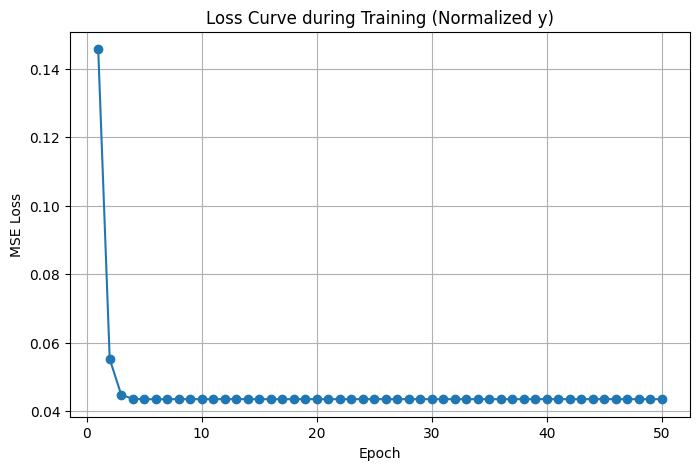


Predicted prices for new houses: [325823.63907065 500514.34266635 251210.74370219]


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# -----------------------------
# 1. Generate synthetic house price data
# -----------------------------
np.random.seed(42)

n_samples = 100

# Features
size = np.random.randint(800, 3000, n_samples)       # square footage
bedrooms = np.random.randint(1, 6, n_samples)        # number of bedrooms
age = np.random.randint(1, 40, n_samples)            # age of house

# Combine features into X (2D)
X = np.column_stack((size, bedrooms, age))

# True weights (unknown to model)
true_w = np.array([150, 20000, -1000])
true_b = 50000

# Target prices with some noise
noise = np.random.normal(0, 20000, n_samples)
y = X.dot(true_w) + true_b + noise

# -----------------------------
# 2. Scale features for SGD
# -----------------------------
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Optional: scale target y for better SGD stability
y_mean = np.mean(y)
y_std = np.std(y)
y_norm = (y - y_mean) / y_std

# -----------------------------
# 3. Create SGD Regressor
# -----------------------------
sgd_model = SGDRegressor(
    max_iter=1,             # 1 epoch per fit call
    learning_rate="constant",
    eta0=0.01,              # smaller learning rate
    penalty=None,
    warm_start=True,        # continue training from previous weights
    random_state=42
)

# -----------------------------
# 4. Train model over multiple epochs
# -----------------------------
epochs = 50
losses = []

for epoch in range(epochs):
    sgd_model.fit(X_norm, y_norm)  # train on normalized y

    y_pred_norm = sgd_model.predict(X_norm)
    loss = mean_squared_error(y_norm, y_pred_norm)
    losses.append(loss)

    print(f"Epoch {epoch+1:02d} | w = {sgd_model.coef_}, b = {sgd_model.intercept_[0]:.4f}, loss = {loss:.4f}")

# -----------------------------
# 5. Plot loss curve
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss Curve during Training (Normalized y)")
plt.grid(True)
plt.show()

# -----------------------------
# 6. Example predictions
# -----------------------------
new_houses = np.array([
    [1500, 3, 10],
    [2500, 4, 5],
    [1200, 2, 20]
])

new_houses_norm = scaler.transform(new_houses)
predictions_norm = sgd_model.predict(new_houses_norm)

# Convert predictions back to original scale
predictions = predictions_norm * y_std + y_mean
print("\nPredicted prices for new houses:", predictions)